In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

### Analysis of the Green Model

In [46]:
df_test = pd.read_csv("data/model_splits/green_split/green_as_train/green_test_predictions.csv")
df_inference = pd.read_csv("data/model_splits/green_split/green_as_train/green_inference_predictions.csv")
df_train = pd.read_csv("data/model_splits/green_split/green_as_train/train-00000-of-00001.csv")

In [5]:
df_test.shape

(3497, 9)

In [6]:
df_inference.shape

(178827, 9)

In [47]:
df_train.shape

(16189, 6)

In [7]:
df_test.head(1)

,q_sentence,q_sentence_nr,manifesto_id,main_codes,label,original_index,input_ids,attention_mask,preds
0,The Green Party for a confident and caring Bri...,1,51110_201706,0,0,16696,"[0, 133, 1628, 1643, 13, 10, 3230, 8, 10837, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0


## Test predictions (green): How well does the model perform? Are the predictions significantly different than the actual codes regarding environmental protection?

In [9]:
print("Test set accuracy:", accuracy_score(df_test["label"], df_test["preds"]))
print("Test set precision:", precision_score(df_test["label"], df_test["preds"]))
print("Test set recall:", recall_score(df_test["label"], df_test["preds"]))
print("Test set F1-score:", f1_score(df_test["label"], df_test["preds"]))

Test set accuracy: 0.9239348012582214
Test set precision: 0.6955602536997886
Test set recall: 0.729490022172949
Test set F1-score: 0.7121212121212122


In [50]:
print("Percentage of target code in the training data:", df_train[df_train["green_code"] == 1].shape[0]/df_train.shape[0])
print("Percentage of target code in real codes:", df_test[df_test["label"] == 1].shape[0]/df_test.shape[0])
print("Percentage of target code in predicted codes:", df_test[df_test["preds"] == 1].shape[0]/df_test.shape[0])

Percentage of target code in the training data: 0.14855766261041448
Percentage of target code in real codes: 0.12896768658850444
Percentage of target code in predicted codes: 0.1352587932513583


In [22]:
#                    Pred. Neg:   Pred. Pos
#    Real Neg:       True Neg --- False Pos
#    Real Pos:       False Neg --- True Pos
print("[[True Neg -- False Pos]\n[ False Neg -- True Pos]]")
print("\nAbsolut confusion matrix\n", confusion_matrix(df_test["label"], df_test["preds"]))
#print("Relativ confusion matrix\n", confusion_matrix(df_test["label"], df_test["preds"])/df_test.shape[0])

[[True Neg -- False Pos]
[ False Neg -- True Pos]]

Absolut confusion matrix
 [[2902  144]
 [ 122  329]]


In [58]:
# Better look at the False Positives: What real codes do they have?
df_false_pos = df_test[(df_test["preds"] == 1) & (df_test["label"] == 0)]
codes_distributions = df_false_pos["main_codes"].value_counts()/df_false_pos.shape[0]
codes_distributions

main_codes
 416    0.354167
-1      0.111111
 411    0.090278
 703    0.069444
 305    0.069444
 403    0.041667
 304    0.034722
 504    0.027778
 503    0.020833
 706    0.020833
 108    0.013889
 201    0.013889
 107    0.013889
 601    0.013889
 404    0.013889
 606    0.013889
 502    0.013889
 0      0.013889
 301    0.006944
 413    0.006944
 406    0.006944
 303    0.006944
 410    0.006944
 701    0.006944
 605    0.006944
Name: count, dtype: float64

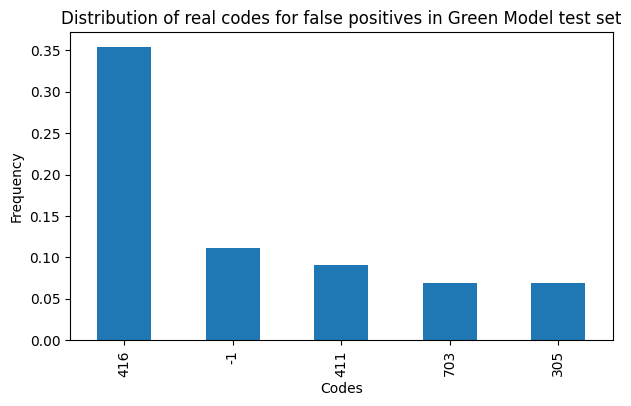

In [59]:
# Create a bar plot
plt.figure(figsize=(7, 4))
codes_distributions[0:5].plot(kind='bar')

# Add labels and title
plt.xlabel('Codes')
plt.ylabel('Frequency')
plt.title('Distribution of real codes for false positives in Green Model test set')

# Show the plot
plt.show()

In [39]:
# looking at examples
pd.set_option('display.max_colwidth', 80)
target_code = 411
df_false_pos[df_false_pos["main_codes"] == target_code].head(5)

,q_sentence,q_sentence_nr,manifesto_id,main_codes,label,original_index,input_ids,attention_mask,preds
78,and investing in flood defences and natural flood management to make every c...,79,51110_201706,411,0,16774,"[0, 463, 4848, 11, 5005, 30356, 8, 1632, 5005, 1052, 7, 146, 358, 435, 8788,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
496,We support the relocation of existing storage facilities on the South Docks ...,242,53110_201602,411,0,54841,"[0, 170, 323, 5, 21326, 9, 2210, 3521, 2644, 15, 5, 391, 211, 6368, 11, 7378...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
497,We will lobby the EU to include the shipping and aviation sector in either t...,243,53110_201602,411,0,54842,"[0, 170, 40, 10181, 5, 1281, 7, 680, 5, 6738, 8, 9848, 1293, 11, 1169, 5, 36...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
498,The volume of ferry usage for passenger traffic can be increased by improvin...,244,53110_201602,411,0,54843,"[0, 133, 3149, 9, 15169, 9453, 13, 4408, 1703, 64, 28, 1130, 30, 3927, 4240,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
582,Investment should be provided via joint EU/Central exchequer funding along w...,328,53110_201602,411,0,54927,"[0, 19923, 1757, 197, 28, 1286, 1241, 2660, 1281, 73, 25674, 1931, 2871, 187...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1


In [41]:
# Testing whether the predictions significantly differ from the real codes

# set up contingency table
contingency_table = pd.DataFrame({#"Group": ["# 501 codes", "# non-501 codes"],
                                  "Model": [df_test[df_test["preds"] == 0].shape[0],
                                            df_test[df_test["preds"] == 1].shape[0]],
                                  "Coders": [df_test[df_test["label"] == 0].shape[0],
                                             df_test[df_test["label"] == 1].shape[0]]})


contingency_table

,Model,Coders
0,3024,3046
1,473,451


In [42]:
chi2_contingency(contingency_table)

(0.5499251160700913,
 0.4583482932772982,
 1,
 array([[3035., 3035.],
        [ 462.,  462.]]))

This shows: the model creates predictions that are very similarly distributed compared to the original codes, as we would have expected.

### Inference Predictions (green)

In [60]:
print("Test set accuracy:", accuracy_score(df_inference["label"], df_inference["preds"]))
print("Test set precision:", precision_score(df_inference["label"], df_inference["preds"]))
print("Test set recall:", recall_score(df_inference["label"], df_inference["preds"]))
print("Test set F1-score:", f1_score(df_inference["label"], df_inference["preds"]))

Test set accuracy: 0.9638365571194506
Test set precision: 0.5248933143669986
Test set recall: 0.7916189931350115
Test set F1-score: 0.6312368135941154


In [61]:
print("Percentage of target code in the training data:", df_train[df_train["green_code"] == 1].shape[0]/df_train.shape[0])
print("Percentage of target code in real codes:", df_inference[df_inference["label"] == 1].shape[0]/df_inference.shape[0])
print("Percentage of target code in predicted codes:", df_inference[df_inference["preds"] == 1].shape[0]/df_inference.shape[0])

Percentage of target code in the training data: 0.14855766261041448
Percentage of target code in real codes: 0.03909924116604316
Percentage of target code in predicted codes: 0.05896760556291835


In [62]:
#                    Pred. Neg:   Pred. Pos
#    Real Neg:       True Neg --- False Pos
#    Real Pos:       False Neg --- True Pos
print("[[True Neg -- False Pos]\n[ False Neg -- True Pos]]")
print("\nAbsolut confusion matrix\n", confusion_matrix(df_inference["label"], df_inference["preds"]))
#print("Relativ confusion matrix\n", confusion_matrix(df_test["label"], df_test["preds"])/df_test.shape[0])

[[True Neg -- False Pos]
[ False Neg -- True Pos]]

Absolut confusion matrix
 [[166825   5010]
 [  1457   5535]]


In [63]:
# This now has a lot of false positives (as we would expect)
# Better look at the False Positives: What real codes do they have?
df_false_pos = df_inference[(df_inference["preds"] == 1) & (df_inference["label"] == 0)]
codes_distributions = df_false_pos["main_codes"].value_counts()/df_false_pos.shape[0]
codes_distributions

main_codes
 703    0.243313
 416    0.180040
 411    0.088623
-1      0.042315
 502    0.041517
 410    0.036327
 303    0.031537
 0      0.029940
 305    0.028144
 401    0.026747
 403    0.026148
 107    0.026148
 601    0.020359
 402    0.017365
 301    0.016766
 202    0.013573
 406    0.012575
 504    0.011377
 605    0.010778
 503    0.009381
 110    0.007984
 302    0.007585
 408    0.007385
 414    0.006986
 108    0.006786
 606    0.005589
 607    0.004391
 104    0.004192
 404    0.003992
 413    0.003992
 109    0.003593
 701    0.003593
 412    0.002794
 506    0.002395
 201    0.002395
 603    0.002395
 706    0.001796
 407    0.001597
 105    0.001198
 405    0.000998
 101    0.000998
 304    0.000798
 203    0.000798
 102    0.000599
 608    0.000599
 409    0.000399
 705    0.000399
 204    0.000200
 602    0.000200
 604    0.000200
 415    0.000200
Name: count, dtype: float64

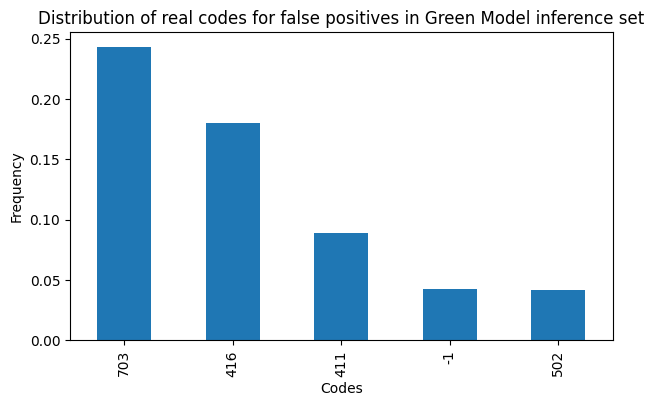

In [64]:
# Create a bar plot
plt.figure(figsize=(7, 4))
codes_distributions[0:5].plot(kind='bar')

# Add labels and title
plt.xlabel('Codes')
plt.ylabel('Frequency')
plt.title('Distribution of real codes for false positives in Green Model inference set')

# Show the plot
plt.show()

In [65]:
# looking at examples
pd.set_option('display.max_colwidth', 80)
target_code = 703
df_false_pos[df_false_pos["main_codes"] == target_code].head(5)

,q_sentence,q_sentence_nr,manifesto_id,main_codes,label,original_index,input_ids,attention_mask,preds
397,8) The EFF government shall pass laws to prohibit the production of Genetica...,398,181210_201405,703,0,192644,"[0, 398, 43, 20, 18625, 168, 5658, 1323, 2074, 7, 18262, 5, 931, 9, 4380, 36...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
398,9) National campaigns shall be undertaken to educate the nation about the da...,399,181210_201405,703,0,192645,"[0, 466, 43, 496, 6392, 5658, 28, 15050, 7, 11427, 5, 1226, 59, 5, 12114, 9,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
1383,"This will also include abalone, especially in Hermanus - Western Cape.",801,181210_201905,703,0,195625,"[0, 713, 40, 67, 680, 4091, 22446, 6, 941, 11, 14358, 687, 111, 2027, 6268, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
1402,which has led to the collapse of the local poultry industry.,820,181210_201905,703,0,195644,"[0, 5488, 34, 669, 7, 5, 6277, 9, 5, 400, 19768, 539, 4, 2, 2, 1549, 4, 20, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
1406,21. The EFF government will construct and maintain central abattoirs i...,824,181210_201905,703,0,195648,"[0, 2146, 4, 20, 1437, 18625, 1437, 1437, 168, 1437, 40, 1437, 12558, 8, 143...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1


In [66]:
# Testing whether the predictions significantly differ from the real codes

# set up contingency table
contingency_table = pd.DataFrame({#"Group": ["# 501 codes", "# non-501 codes"],
                                  "Model": [df_inference[df_inference["preds"] == 0].shape[0],
                                            df_inference[df_inference["preds"] == 1].shape[0]],
                                  "Coders": [df_inference[df_inference["label"] == 0].shape[0],
                                             df_inference[df_inference["label"] == 1].shape[0]]})


contingency_table

,Model,Coders
0,168282,171835
1,10545,6992


In [67]:
chi2_contingency(contingency_table)

(756.528614302172,
 1.5270522873206464e-166,
 1,
 array([[170058.5, 170058.5],
        [  8768.5,   8768.5]]))

So the model predictions are very clearly significantly different that the real predictions!

## Now the same thing, but for the NonGreen Model

In [68]:
df_test = pd.read_csv("data/model_splits/green_split/non_green_as_train/nongreen_test_predictions.csv")
df_inference = pd.read_csv("data/model_splits/green_split/non_green_as_train/nongreen_inference_predictions.csv")
df_train = pd.read_csv("data/model_splits/green_split/non_green_as_train/train-00000-of-00001.csv")


In [69]:
df_test.shape

(28791, 9)

In [70]:
df_inference.shape

(23264, 9)

In [71]:
df_train.shape

(123816, 6)

In [72]:
df_test.head(1)

,q_sentence,q_sentence_nr,manifesto_id,main_codes,label,original_index,input_ids,attention_mask,preds
0,OUR VISION AND PLAN,1,181310_201405,-1,0,192831,"[0, 14257, 468, 36296, 4248, 37330, 2, 2, 14257, 468, 36296, 4248, 37330, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0


### Test predictions (NonGreen): How well does the model perform? Are the predictions significantly different than the actual codes regarding environmental protection?


In [73]:
print("Test set accuracy:", accuracy_score(df_test["label"], df_test["preds"]))
print("Test set precision:", precision_score(df_test["label"], df_test["preds"]))
print("Test set recall:", recall_score(df_test["label"], df_test["preds"]))
print("Test set F1-score:", f1_score(df_test["label"], df_test["preds"]))

Test set accuracy: 0.975929978118162
Test set precision: 0.6751497005988024
Test set recall: 0.7769164513350559
Test set F1-score: 0.722466960352423


In [74]:
print("Percentage of target code in the training data:", df_train[df_train["green_code"] == 1].shape[0]/df_train.shape[0])
print("Percentage of target code in real codes:", df_test[df_test["label"] == 1].shape[0]/df_test.shape[0])
print("Percentage of target code in predicted codes:", df_test[df_test["preds"] == 1].shape[0]/df_test.shape[0])

Percentage of target code in the training data: 0.03909026297085998
Percentage of target code in real codes: 0.0403251015942482
Percentage of target code in predicted codes: 0.04640338994824772


In [75]:
#                    Pred. Neg:   Pred. Pos
#    Real Neg:       True Neg --- False Pos
#    Real Pos:       False Neg --- True Pos
print("[[True Neg -- False Pos]\n[ False Neg -- True Pos]]")
print("\nAbsolut confusion matrix\n", confusion_matrix(df_test["label"], df_test["preds"]))
#print("Relativ confusion matrix\n", confusion_matrix(df_test["label"], df_test["preds"])/df_test.shape[0])

[[True Neg -- False Pos]
[ False Neg -- True Pos]]

Absolut confusion matrix
 [[27196   434]
 [  259   902]]


In [76]:
# Better look at the False Positives: What real codes do they have?
df_false_pos = df_test[(df_test["preds"] == 1) & (df_test["label"] == 0)]
codes_distributions = df_false_pos["main_codes"].value_counts()/df_false_pos.shape[0]
codes_distributions

main_codes
 416    0.308756
 703    0.122120
 411    0.071429
 303    0.055300
-1      0.048387
 107    0.043779
 410    0.032258
 202    0.032258
 502    0.029954
 601    0.027650
 302    0.023041
 605    0.023041
 402    0.016129
 305    0.016129
 401    0.016129
 403    0.013825
 301    0.013825
 606    0.011521
 503    0.011521
 414    0.011521
 201    0.009217
 701    0.006912
 406    0.006912
 603    0.006912
 0      0.004608
 404    0.004608
 607    0.004608
 108    0.004608
 304    0.004608
 412    0.002304
 407    0.002304
 504    0.002304
 102    0.002304
 109    0.002304
 706    0.002304
 413    0.002304
 506    0.002304
Name: count, dtype: float64

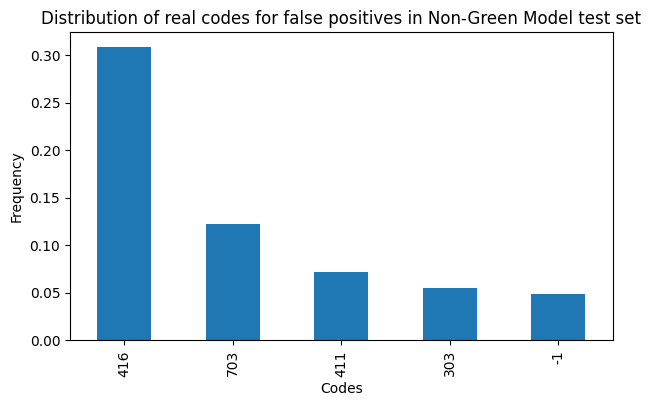

In [78]:
# Create a bar plot
plt.figure(figsize=(7, 4))
codes_distributions[0:5].plot(kind='bar')

# Add labels and title
plt.xlabel('Codes')
plt.ylabel('Frequency')
plt.title('Distribution of real codes for false positives in Non-Green Model test set')

# Show the plot
plt.show()

In [79]:
# looking at examples
pd.set_option('display.max_colwidth', 80)
target_code = 411
df_false_pos[df_false_pos["main_codes"] == target_code].head(5)

,q_sentence,q_sentence_nr,manifesto_id,main_codes,label,original_index,input_ids,attention_mask,preds
1247,Public transport must also make it possible for people to reduce their use o...,521,181411_201405,411,0,194078,"[0, 22649, 4240, 531, 67, 146, 24, 678, 13, 82, 7, 1888, 49, 304, 9, 940, 17...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
3348,Audit the existing UK flooding infrastructure to establish which areas need ...,307,51430_201912,411,0,30425,"[0, 37779, 405, 5, 2210, 987, 5681, 2112, 7, 5242, 61, 911, 240, 3887, 915, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
7350,"Despite the rhetoric, environmental destruction is continuing apace. We call...",104,53250_201602,411,0,56197,"[0, 15243, 5, 8770, 6, 3039, 8181, 16, 3348, 6256, 4450, 4, 166, 486, 13, 53...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
9258,We will prioritise the establishment of an all-Ireland animal health system ...,57,53520_200705,411,0,41457,"[0, 170, 40, 13993, 1496, 5, 7147, 9, 41, 70, 12, 26737, 3477, 474, 467, 11,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
10079,We will place a requirement on all public transport vehicles and public serv...,878,53520_200705,411,0,42278,"[0, 170, 40, 317, 10, 7404, 15, 70, 285, 4240, 1734, 8, 285, 544, 1734, 7, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1


In [82]:
# Testing whether the predictions significantly differ from the real codes

# set up contingency table
contingency_table = pd.DataFrame({#"Group": ["# 501 codes", "# non-501 codes"],
                                  "Model": [df_test[df_test["preds"] == 0].shape[0],
                                            df_test[df_test["preds"] == 1].shape[0]],
                                  "Coders": [df_test[df_test["label"] == 0].shape[0],
                                             df_test[df_test["label"] == 1].shape[0]]})


contingency_table

,Model,Coders
0,27455,27630
1,1336,1161


Our model overpredicts 501 already here.

In [83]:
chi2_contingency(contingency_table)

(12.674573249358794,
 0.0003706618047049488,
 1,
 array([[27542.5, 27542.5],
        [ 1248.5,  1248.5]]))

So here the model does differ significantly from the predictions, but not an insane amount.

### Inference predictions (Non Green)

In [84]:
print("Inference set accuracy:", accuracy_score(df_inference["label"], df_inference["preds"]))
print("Inference set precision:", precision_score(df_inference["label"], df_inference["preds"]))
print("Inference set recall:", recall_score(df_inference["label"], df_inference["preds"]))
print("Inference set F1-score:", f1_score(df_inference["label"], df_inference["preds"]))

Inference set accuracy: 0.9094738651994498
Inference set precision: 0.6907751091703057
Inference set recall: 0.7223173515981736
Inference set F1-score: 0.7061941964285715


In [85]:
print("Percentage of target code in the training data:", df_train[df_train["green_code"] == 1].shape[0]/df_train.shape[0])
print("Percentage of target code in real codes:", df_inference[df_inference["label"] == 1].shape[0]/df_inference.shape[0])
print("Percentage of target code in predicted codes:", df_inference[df_inference["preds"] == 1].shape[0]/df_inference.shape[0])

Percentage of target code in the training data: 0.03909026297085998
Percentage of target code in real codes: 0.15061898211829436
Percentage of target code in predicted codes: 0.1574965612104539


Very interesting that our model overpredicts in this case as well. We would definitely expect it to underpredict (if coders give less 501 codes to Non-Green parties)

In [86]:
#                    Pred. Neg:   Pred. Pos
#    Real Neg:       True Neg --- False Pos
#    Real Pos:       False Neg --- True Pos
print("[[True Neg -- False Pos]\n[ False Neg -- True Pos]]")
print("\nAbsolut confusion matrix\n", confusion_matrix(df_inference["label"], df_inference["preds"]))
#print("Relativ confusion matrix\n", confusion_matrix(df_test["label"], df_test["preds"])/df_test.shape[0])

[[True Neg -- False Pos]
[ False Neg -- True Pos]]

Absolut confusion matrix
 [[18627  1133]
 [  973  2531]]


Looking at the False Negatives (need to look at the actual texts to find patterns) might be good!

In [87]:
# Better look at the False Positives: What real codes do they have?
df_false_pos = df_inference[(df_inference["preds"] == 1) & (df_inference["label"] == 0)]
codes_distributions = df_false_pos["main_codes"].value_counts()/df_false_pos.shape[0]
codes_distributions

main_codes
 416    0.454545
 107    0.068844
 703    0.065313
 411    0.052074
-1      0.044131
 410    0.034422
 305    0.034422
 403    0.029126
 601    0.022948
 504    0.019417
 0      0.015887
 503    0.013239
 605    0.012357
 301    0.012357
 502    0.010591
 408    0.010591
 414    0.009709
 302    0.007944
 303    0.007944
 506    0.007061
 706    0.006178
 406    0.006178
 108    0.006178
 607    0.005296
 202    0.005296
 606    0.005296
 402    0.004413
 401    0.004413
 701    0.003530
 412    0.002648
 201    0.002648
 105    0.002648
 110    0.001765
 705    0.001765
 603    0.001765
 602    0.001765
 409    0.000883
 407    0.000883
 109    0.000883
 106    0.000883
 404    0.000883
 104    0.000883
Name: count, dtype: float64

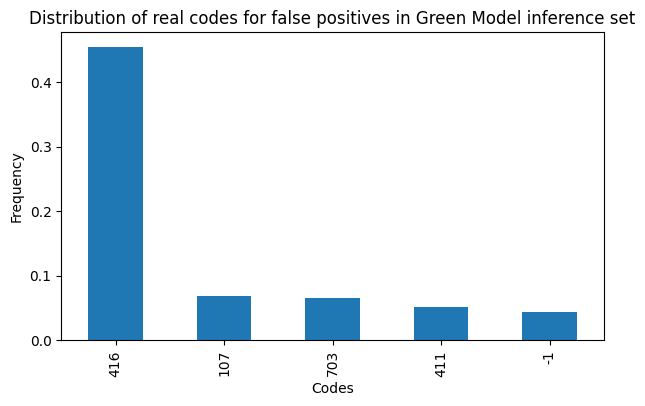

In [88]:
# Create a bar plot
plt.figure(figsize=(7, 4))
codes_distributions[0:5].plot(kind='bar')

# Add labels and title
plt.xlabel('Codes')
plt.ylabel('Frequency')
plt.title('Distribution of real codes for false positives in Green Model inference set')

# Show the plot
plt.show()

416 (anti-growth/sustainability): likely coded as 501 more often when party is Green!

In [89]:
# looking at examples
pd.set_option('display.max_colwidth', 80)
target_code = 416
df_false_pos[df_false_pos["main_codes"] == target_code].head(5)

,q_sentence,q_sentence_nr,manifesto_id,main_codes,label,original_index,input_ids,attention_mask,preds
149,that operates within the Earth’s resource limits.,150,51110_201505,416,0,4599,"[0, 6025, 4497, 624, 5, 3875, 17, 27, 29, 5799, 4971, 4, 2, 2, 8232, 6, 1363...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
308,"The rich and powerful, in particular, have spent too long treating the Earth...",309,51110_201505,416,0,4758,"[0, 133, 4066, 8, 2247, 6, 11, 1989, 6, 33, 1240, 350, 251, 8959, 5, 3875, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
361,Prohibit developers from being allowed to destroy unique habitats by way of ...,362,51110_201505,416,0,4811,"[0, 10653, 45529, 5485, 31, 145, 1220, 7, 8439, 2216, 29073, 30, 169, 9, 288...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
371,"This comes with great ‘external costs’ to the environment, human health, far...",372,51110_201505,416,0,4821,"[0, 713, 606, 19, 372, 44, 711, 43166, 1042, 17, 27, 7, 5, 1737, 6, 1050, 47...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
372,"Soil erosion, depletion of water resources, pollution, loss of biodiversity ...",373,51110_201505,416,0,4822,"[0, 2847, 718, 19407, 6, 39309, 9, 514, 1915, 6, 6631, 6, 872, 9, 28809, 8, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1


In [90]:
# Testing whether the predictions significantly differ from the real codes

# set up contingency table
contingency_table = pd.DataFrame({#"Group": ["# 501 codes", "# non-501 codes"],
                                  "Model": [df_inference[df_inference["preds"] == 0].shape[0],
                                            df_inference[df_inference["preds"] == 1].shape[0]],
                                  "Coders": [df_inference[df_inference["label"] == 0].shape[0],
                                             df_inference[df_inference["label"] == 1].shape[0]]})


contingency_table

,Model,Coders
0,19600,19760
1,3664,3504


We are predicting MORE environmental codes compared to the coders. This is not what we would expect tbh...

In [91]:
chi2_contingency(contingency_table)

(4.169227052482578,
 0.041164575177359976,
 1,
 array([[19680., 19680.],
        [ 3584.,  3584.]]))

This is less significantly different than when comparing to the test set, also not what we would expect.